# __Clean Up Your Act__

### *Notebook One*
### Contributors: Monique Ticzon, Edalkachew Desta, Jim Reeves, Matt Houk

In [28]:
# Import the libraries: 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi

import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")

from MCForecastTools import MCSimulation

%matplotlib inline



In [4]:
# Load up the Alpaca API we are going to use: 

from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Pulling the data: 

tickersp = ['SPY']

tickersfin = ['ESGD','EFAX','SPYX', 'CRBN', 'ETHO', 'FAN']

timeframe = "1D"

# Pull one year for 1 year comparison 
start_date_one_year = pd.Timestamp("2020-01-14", tz="America/New_York").isoformat()
end_date_one_year = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

# pulling 3 years for remaining 3 comparisons 
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

# Here is the API call for the working tickers: 
esg_datafin = api.get_barset(
    tickersfin,
    timeframe,
    start=start_date,
    end=end_date
).df

esg_datafin_oneyear = api.get_barset(
    tickersfin,
    timeframe,
    start=start_date_one_year,
    end=end_date_one_year
).df
# API call for SP500
sp500_data = api.get_barset(
    tickersp,
    timeframe,
    start=start_date,
    end=end_date
).df 

# explore some data 
# esg_datafin.tail(10)
# esg_datafin_oneyear.tail(10)


CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                             EFAX                                   ...  \
                             open    high    low    close   volume  ...   
time                                                                ...   
2021-01-08 00:00:00-05:00  80.225  80.380  79.88  80.3000   5610.0  ...   
2021-01-11 00:00:00-05:00  78.900  79.510  78.90  79.4169   8060.0  ...   
2021-01-12 00:00:00-05:00  79.165  79.540  79.03  79.5400   4674.0  ...   
2021-01-13 00:00:00-05:00  79.660  79.740  79.30  79.4841   2435.0  ...   
2021-01-14 00:00:00-05:00  79.540  80.268  79.54  80.2680  11677.0  ...   

                             FAN                                  SPYX         \
                            open     high    low  close  volume   open   high   
time                                                                            
2021-01-08 00:00:00-05:00  26.00  26.1400  25.73  25.97  590216  94.25  94.25   
2021-01-11 00:00:00-05:00  25.31  25.5100  25.15  25.47  481884  94.00  94.07   
2021-01-12 00:00:00-05:00  25.21  25.2156  24.91  25.03  539505  93.93  93.93   
2021-01-13 00:00:00-05:00  25.21  25.2400  25.10  25.10  373769  93.50  94.06   
2021-01-14 00:00:00-05:00  25.11  25.1100  24.80  24.85  585176  94.17  94.17   

                                                  
                               low  close volume  
time                                              
2021-01-08 00:00:00-05:00  93.3133  94.20  28302  
2021-01-11 00:00:00-05:00  93.3925  93.73  38854  
2021-01-12 00:00:00-05:00  93.0600  93.65  15194  
2021-01-13 00:00:00-05:00  93.4100  93.83  17488  
2021-01-14 00:00:00-05:00  93.3696  93.44  20680  

[5 rows x 30 columns]

In [10]:
# Basic data for 3 year call 
esg_datafin.describe()

CRBN                                                    \
             open        high         low       close        volume   
count  929.000000  929.000000  929.000000  929.000000  9.290000e+02   
mean   119.050935  119.791873  118.294410  119.263777  1.436545e+04   
std     10.665972    9.801833   12.066609    9.900015  5.955026e+04   
min      0.000000   91.000000    0.000000   89.440000  1.320000e+02   
25%    112.660000  113.700000  111.990000  113.070000  5.014000e+03   
50%    117.820000  118.369000  117.390000  117.950000  7.231000e+03   
75%    123.070000  123.420000  122.570000  123.210000  1.279700e+04   
max    153.090000  153.478400  152.520000  153.340000  1.720440e+06   

             EFAX                                                     ...  \
             open        high         low       close         volume  ...   
count  880.000000  880.000000  880.000000  880.000000     880.000000  ...   
mean    68.649934   69.000934   68.410840   68.839216    4262.684091  ...   
std      5.686690    4.613316    6.140629    4.646381   11629.244065  ...   
min      0.000000   49.970000    0.000000   49.250000       1.000000  ...   
25%     66.352500   66.462775   66.240000   66.351000     620.000000  ...   
50%     69.400000   69.575000   69.240000   69.397500    1375.500000  ...   
75%     71.773500   72.012500   71.649675   71.908175    3442.500000  ...   
max     80.225000   80.380000   79.880000   80.300000  180001.000000  ...   

              FAN                                                    \
             open        high         low       close        volume   
count  931.000000  931.000000  931.000000  931.000000  9.310000e+02   
mean    13.970481   14.029242   13.889013   13.968169  6.826176e+04   
std      2.369840    2.382922    2.398088    2.372064  1.291487e+05   
min     10.580000   10.590000    0.000000   10.230000  1.310000e+02   
25%     12.820000   12.880000   12.775200   12.830000  1.524500e+04   
50%     13.244000   13.289900   13.200000   13.240000  2.745700e+04   
75%     13.985000   14.030000   13.915000   13.980000  6.137650e+04   
max     26.000000   26.140000   25.730000   26.015000  2.241606e+06   

             SPYX                                                     
             open        high         low       close         volume  
count  930.000000  930.000000  930.000000  930.000000     930.000000  
mean    70.507701   70.962778   69.982988   70.553122   23017.260215  
std      9.098296    8.532972    9.330577    8.470685   35091.283656  
min      0.000000   57.130000    0.000000   55.585000     165.000000  
25%     64.731050   65.000000   64.176250   64.670050    5925.750000  
50%     69.115000   69.310000   68.537200   68.895000   11517.500000  
75%     75.307500   75.862600   74.865000   75.235000   25362.250000  
max     94.250000   94.250000   93.410000   94.200000  449801.000000  

[8 rows x 30 columns]

In [13]:
# Create data frame with closing prices and calculate daily returns 

df_closing_prices = pd.DataFrame()

df_closing_prices['SPYX'] = esg_datafin['SPYX']['close']
df_closing_prices['ESGD'] = esg_datafin['ESGD']['close']
df_closing_prices['CRBN'] = esg_datafin['CRBN']['close']
df_closing_prices['EFAX'] = esg_datafin['EFAX']['close']
df_closing_prices['ETHO'] = esg_datafin['ETHO']['close']
df_closing_prices['FAN'] = esg_datafin['FAN']['close']

df_closing_prices.index = df_closing_prices.index.date 

df_daily_returns = df_closing_prices.pct_change().dropna()

df_daily_returns.head()


,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
2017-05-05,0.000969,0.010275,0.006383,0.000000,-0.004685,0.012066
2017-05-08,0.000055,-0.006689,0.001213,0.016593,-0.004707,-0.010432
2017-05-09,0.000183,-0.003665,0.000838,-0.013856,0.000676,-0.001506
2017-05-10,0.002755,0.001919,0.000653,-0.000588,0.016205,-0.001508
2017-05-11,-0.003959,-0.003512,-0.003256,0.013838,-0.013953,0.000000


In [14]:
# Configure simulation for 1 year, 5 year, 10 year and 20 year.
num_sims = 500 
# 1 year: Using data pulled from Alpaca for 2020-2021 (1year, 'esg_datafin_oneyear') with even weights 

MC_oneyear = MCSimulation(
    portfolio_data = esg_datafin_oneyear,
    num_simulation = 500,
    num_trading_days =252)


# 5 year: using all pulled data (esg_datafin)

MC_fiveyear = MCSimulation(
    portfolio_data = esg_datafin,
    num_simulation = 500,
    num_trading_days =252*5)


# 10 Year 
MC_Sim_10 = MCSimulation(
    portfolio_data = esg_datafin,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

# 20 year 

MC_esg_20 = MCSimulation(
    portfolio_data = esg_datafin,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [19]:
# Checkout input data, should be same for all for last year: 

MC_esg_20.portfolio_data.tail()

CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                                          EFAX                          ...  \
                          daily_return    open    high    low    close  ...   
time                                                                    ...   
2021-01-08 00:00:00-05:00     0.007225  80.225  80.380  79.88  80.3000  ...   
2021-01-11 00:00:00-05:00    -0.007109  78.900  79.510  78.90  79.4169  ...   
2021-01-12 00:00:00-05:00     0.001091  79.165  79.540  79.03  79.5400  ...   
2021-01-13 00:00:00-05:00     0.001732  79.660  79.740  79.30  79.4841  ...   
2021-01-14 00:00:00-05:00    -0.001048  79.540  80.268  79.54  80.2680  ...   

                             FAN                                 SPYX         \
                             low  close    volume daily_return   open   high   
time                                                                           
2021-01-08 00:00:00-05:00  25.73  25.97  590216.0    -0.001730  94.25  94.25   
2021-01-11 00:00:00-05:00  25.15  25.47  481884.0    -0.019253  94.00  94.07   
2021-01-12 00:00:00-05:00  24.91  25.03  539505.0    -0.017275  93.93  93.93   
2021-01-13 00:00:00-05:00  25.10  25.10  373769.0     0.002797  93.50  94.06   
2021-01-14 00:00:00-05:00  24.80  24.85  585176.0    -0.009960  94.17  94.17   

                                                                 
                               low  close   volume daily_return  
time                                                             
2021-01-08 00:00:00-05:00  93.3133  94.20  28302.0     0.003836  
2021-01-11 00:00:00-05:00  93.3925  93.73  38854.0    -0.004989  
2021-01-12 00:00:00-05:00  93.0600  93.65  15194.0    -0.000854  
2021-01-13 00:00:00-05:00  93.4100  93.83  17488.0     0.001922  
2021-01-14 00:00:00-05:00  93.3696  93.44  20680.0    -0.004156  

[5 rows x 36 columns]

In [27]:
# Run Sim for each: 

MC_oneyear.calc_cumulative_return()
MC_fiveyear.calc_cumulative_return()
MC_Sim_10.calc_cumulative_return()
MC_esg_20.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999804,0.996619,0.997144,1.007821,1.001854,1.005565,0.999994,0.998555,1.001148,0.991362,...,1.005398,0.999921,1.007306,0.997513,1.003644,1.005833,1.001613,1.006421,0.998335,1.001644
2,0.999414,0.994278,0.991710,1.016408,1.007743,1.004410,1.003183,0.997524,1.014190,0.997994,...,1.002217,1.005958,1.007313,1.002923,1.005950,1.009607,1.007295,1.013159,0.990838,1.005740
3,0.994481,0.998702,0.994853,1.013000,1.007986,1.005420,0.999000,0.992556,1.008878,1.002104,...,0.997923,1.001169,1.005065,1.012027,1.007776,1.021951,1.007684,1.012754,0.986896,1.009979
4,0.998039,0.997327,0.998435,1.012061,1.001039,0.994092,0.998560,0.996009,1.002452,1.000498,...,1.001013,0.996674,1.005853,1.017591,1.011271,1.025020,1.013129,1.012095,0.988089,1.006245
5,1.007520,1.000959,1.000838,1.007361,1.001713,0.994479,1.000588,1.004054,0.997276,0.994182,...,0.996034,0.999240,1.015028,1.020581,1.013372,1.031496,1.006143,1.006802,0.990771,1.010356
6,1.006136,0.997498,0.996668,1.005220,1.004262,0.993455,1.005723,1.003684,0.987973,0.989082,...,0.995206,1.001987,1.024545,1.019384,1.002242,1.025939,1.014134,1.004099,0.994371,1.011643
7,1.005783,0.995972,0.994983,1.010952,1.008267,0.988925,1.003099,1.002570,0.995331,0.995446,...,0.990532,1.004888,1.025052,1.018720,1.002057,1.032359,1.016954,1.007733,0.986916,1.004916
8,1.016642,1.001292,0.996973,1.010948,1.005384,0.987460,1.009914,1.007643,0.996285,1.002229,...,0.993683,1.008607,1.030000,1.019998,1.004155,1.034297,1.019949,1.000523,0.982390,0.996504
9,1.015654,1.010301,1.000806,1.002965,1.009846,0.984003,1.015112,1.005965,0.990664,0.997443,...,0.992612,1.005714,1.026917,1.024364,1.014556,1.028427,1.028880,1.005734,0.973798,1.009037


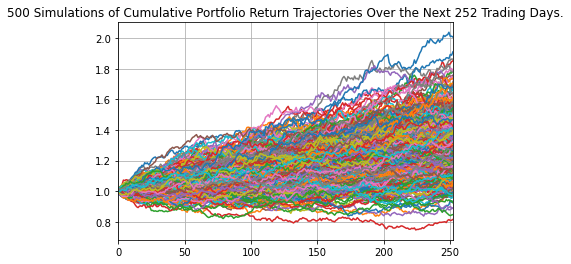

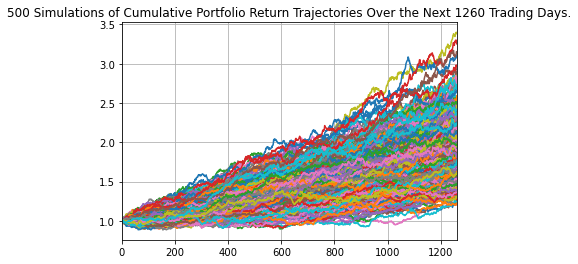

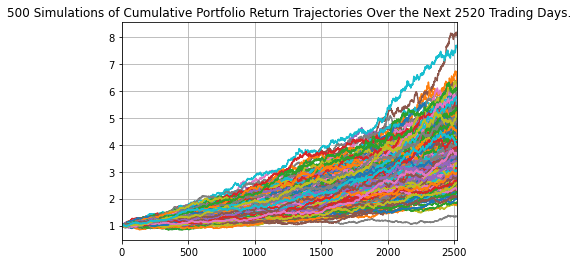

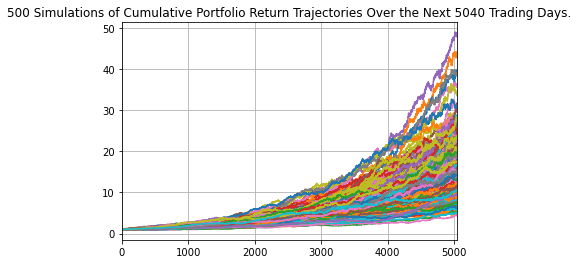

In [40]:
# Create Line plots of each Sim in tabs 

# rows = pn.Row(MC_oneyear.plot_simulation().grid(), MC_fiveyear.plot_simulation().grid())
line_plot_one_year = MC_oneyear.plot_simulation().grid()
line_plot_five_year = MC_fiveyear.plot_simulation().grid()
line_plot_ten_year = MC_Sim_10.plot_simulation().grid()
line_plot_twenty_year = MC_esg_20.plot_simulation().grid()




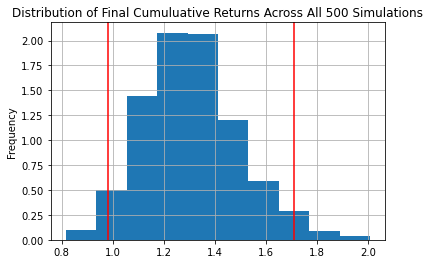

In [50]:
# 1 year distribution plot 
dist_plot_one_year = MC_oneyear.plot_distribution().grid()

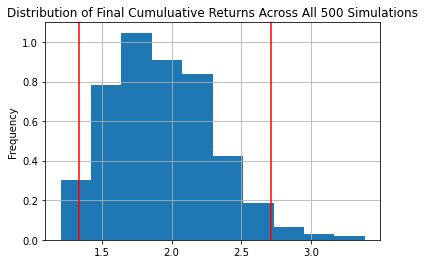

In [51]:
# 5 year distribution plot 
dist_plot_five_year = MC_fiveyear.plot_distribution().grid()

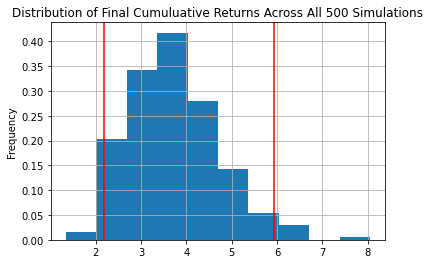

In [52]:
# 10 year distribution plot 
dist_plot_ten_year = MC_Sim_10.plot_distribution().grid()

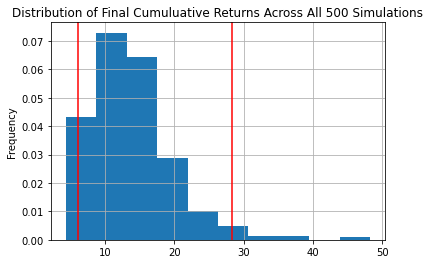

In [53]:
# 20 year distribution plot 
dist_plot_twenty_year = MC_esg_20.plot_distribution().grid()

In [68]:
stat_data_one_year = MC_oneyear.summarize_cumulative_return()
summary_stat_data = MC_fiveyear.summarize_cumulative_return()
stat_data_10_year = MC_Sim_10.summarize_cumulative_return()
stat_data_20_year = MC_esg_20.summarize_cumulative_return()
print(f"Stats:\n1 Year\n\n{stat_data_one_year}, \n\n5 year:\n{summary_stat_data}, \n\n10 year:\n{stat_data_10_year}, \n\n20 year:\n{stat_data_20_year}")

Stats:
1 Year

count           500.000000
mean              1.307621
std               0.186541
min               0.815362
25%               1.178265
50%               1.296913
75%               1.421630
max               2.008649
95% CI Lower      0.979328
95% CI Upper      1.708254
Name: 252, dtype: float64, 

5 year:
count           500.000000
mean              1.930139
std               0.371837
min               1.205032
25%               1.652959
50%               1.888248
75%               2.165422
max               3.383396
95% CI Lower      1.334991
95% CI Upper      2.714057
Name: 1260, dtype: float64, 

10 year:
count           500.000000
mean              3.722899
std               0.969011
min               1.342618
25%               3.047602
50%               3.608953
75%               4.260404
max               8.050511
95% CI Lower      2.184798
95% CI Upper      5.927470
Name: 2520, dtype: float64, 

20 year:
count           500.000000
mean             13.929728
std   

In [1]:
# Add: 
#Range of possible outcomes based on the confidence interval 
summary_stat_data # 5 year 
stat_data_10_year
stat_data_20_year

#Range of possible outcomes based on the confidence interval: 1 Year 
ci_lower = round(stat_data_one_year[8]*10000,2)
ci_upper = round(stat_data_one_year[9]*10000,2)

print(f'There is a 95% chance that an initial investment of $10000 in the portfolio '
      f'over the next one year will end within the range of'
      f'${ci_lower}and ${ci_upper}')

#Range of possible outcomes based on the confidence interval: 5 Year 
ci_lower = round(summary_stat_data[8]*10000,2)
ci_upper = round(summary_stat_data[9]*10000,2)

print(f'There is a 95% chance that an initial investment of $10000 in the portfolio '
      f'over the next five years will end within the range of'
      f'${ci_lower}and ${ci_upper}')

#Range of possible outcomes based on the confidence interval: 10 Year 
ci_lower = round(stat_data_10_year[8]*10000,2)
ci_upper = round(stat_data_10_year[9]*10000,2)

print(f'There is a 95% chance that an initial investment of $10000 in the portfolio '
      f'over the next ten years will end within the range of'
      f'${ci_lower}and ${ci_upper}')

#Range of possible outcomes based on the confidence interval: 20 Year 
ci_lower = round(stat_data_20_year[8]*10000,2)
ci_upper = round(stat_data_20_year[9]*10000,2)

print(f'There is a 95% chance that an initial investment of $10000 in the portfolio '
      f'over the next twenty years will end within the range of'
      f'${ci_lower}and ${ci_upper}')

NameError: name 'summary_stat_data' is not defined

In [70]:
# Compute summary statistics from the simulated daily returns

sim_ret_data = {
    "mean": list(MC_fiveyear.simulated_return.mean(axis=1)),
                 "median": list(MC_fiveyear.simulated_return.median(axis=1)),
                                "min": list(MC_fiveyear.simulated_return.min(axis=1)),
                                            "max": list(MC_fiveyear.simulated_return.max(axis=1))}
               
df_sim_ret = pd.DataFrame(sim_ret_data)
               
df_sim_ret.tail()

,mean,median,min,max
1256,1.925301,1.882233,1.197818,3.391276
1257,1.927263,1.884750,1.200791,3.390226
1258,1.928030,1.889211,1.208480,3.400325
1259,1.929138,1.889905,1.206760,3.398296
1260,1.930139,1.888248,1.205032,3.383396


<AxesSubplot:title={'center':'Sim daily return behavior of stock over the next five years'}>

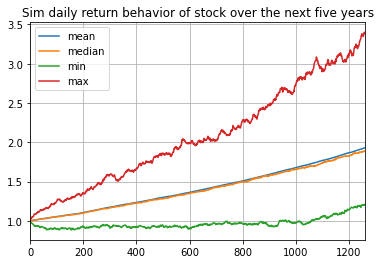

In [71]:
df_sim_ret.plot(grid=True,title='Sim daily return behavior of stock over the next five years') 

In [ ]:
# SP 500 data for comparison 
sp500_data.describe()


In [ ]:
# Create df for closing prices for SP 500 using SPY which duplicates the results of the overall SP 500 

df_closing_prices_spy = sp500_data['SPY']['close']

df_closing_prices_spy = pd.DataFrame(df_closing_prices_spy)

df_closing_prices_spy.index = df_closing_prices_spy.index.date 

df_daily_returns_spy = df_closing_prices_spy.pct_change().dropna()

df_daily_returns_spy.head()

In [ ]:
# Combining the daily returns of SP 500 and the the ESG set 

df_daily_returns_spy = df_daily_returns_spy.rename(columns={"close":"S&P 500"})

all_portfolios = pd.concat([df_daily_returns, df_daily_returns_spy], axis="columns", join="inner")
all_portfolios.head()

In [ ]:
# Plot them all:

# Create different plots? 

all_portfolios.plot(figsize=(20, 10), title="Daily Returns",grid=True)

## *Should this be done for all data sets as the SIM was different for each?* 

In [ ]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns",grid=True)

In [ ]:
# Calculate the daily standard deviations of all portfolios
all_portfolios.std()

In [ ]:
# Are the ESG's riskier than the SP 500? 

Sp500_risk = all_portfolios['S&P 500'].std()
all_portfolios.std() > Sp500_risk

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_roll_std = all_portfolios.rolling(window=21).std()

# Plot the rolling standard deviation
all_portfolios_roll_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation",grid=True)



## To-Do
- Play with different plots. 
- Change .MCSIM output to hvplot or plotly 
